IT-641 Deep Learning

Lab 2

#House Price Prediction: Predict house prices using advanced regression techniques

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second
is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one
material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include
bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other
categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale

It seems quite a lot of information in columns.


#Tasks:
For the given datasets perform the following tasks:

1. Load Data and Find out if it has any missing values

2. Correct the missing values

3. Identify and encode necessary features

4. Identify and normalize necessary features

5. Split the dataset into train set (75%) test set (15%) an validation set (10%)

6. For Regression Task: Write a code manually for Linear Regression and
compare the results with sklearns linear regression model.

7. For Classification Task: Write manual code for logistic regression using
Gradient Descent and compare it with sklearns Logistic Regression

8. Use all the respective model performance criteria and compare to model

9. Discuss under-fitting and overfitting based upon results


#1.Loading Required Libraries

In [483]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
import warnings
warnings.filterwarnings(action = 'ignore')
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,cross_val_predict
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


#2. Load Dataset

In [484]:
data = pd.read_csv("https://raw.githubusercontent.com/Jatansahu/DEEP_LEARNING_ASSIGNMENTS/main/LAB_02/HousePricePrediction_dataset02.csv")

In [485]:
# Previewing data
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Looking at the above dataset our target variable is the column "SalePrice"

#3.Looking for Null values

In [486]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<Axes: >

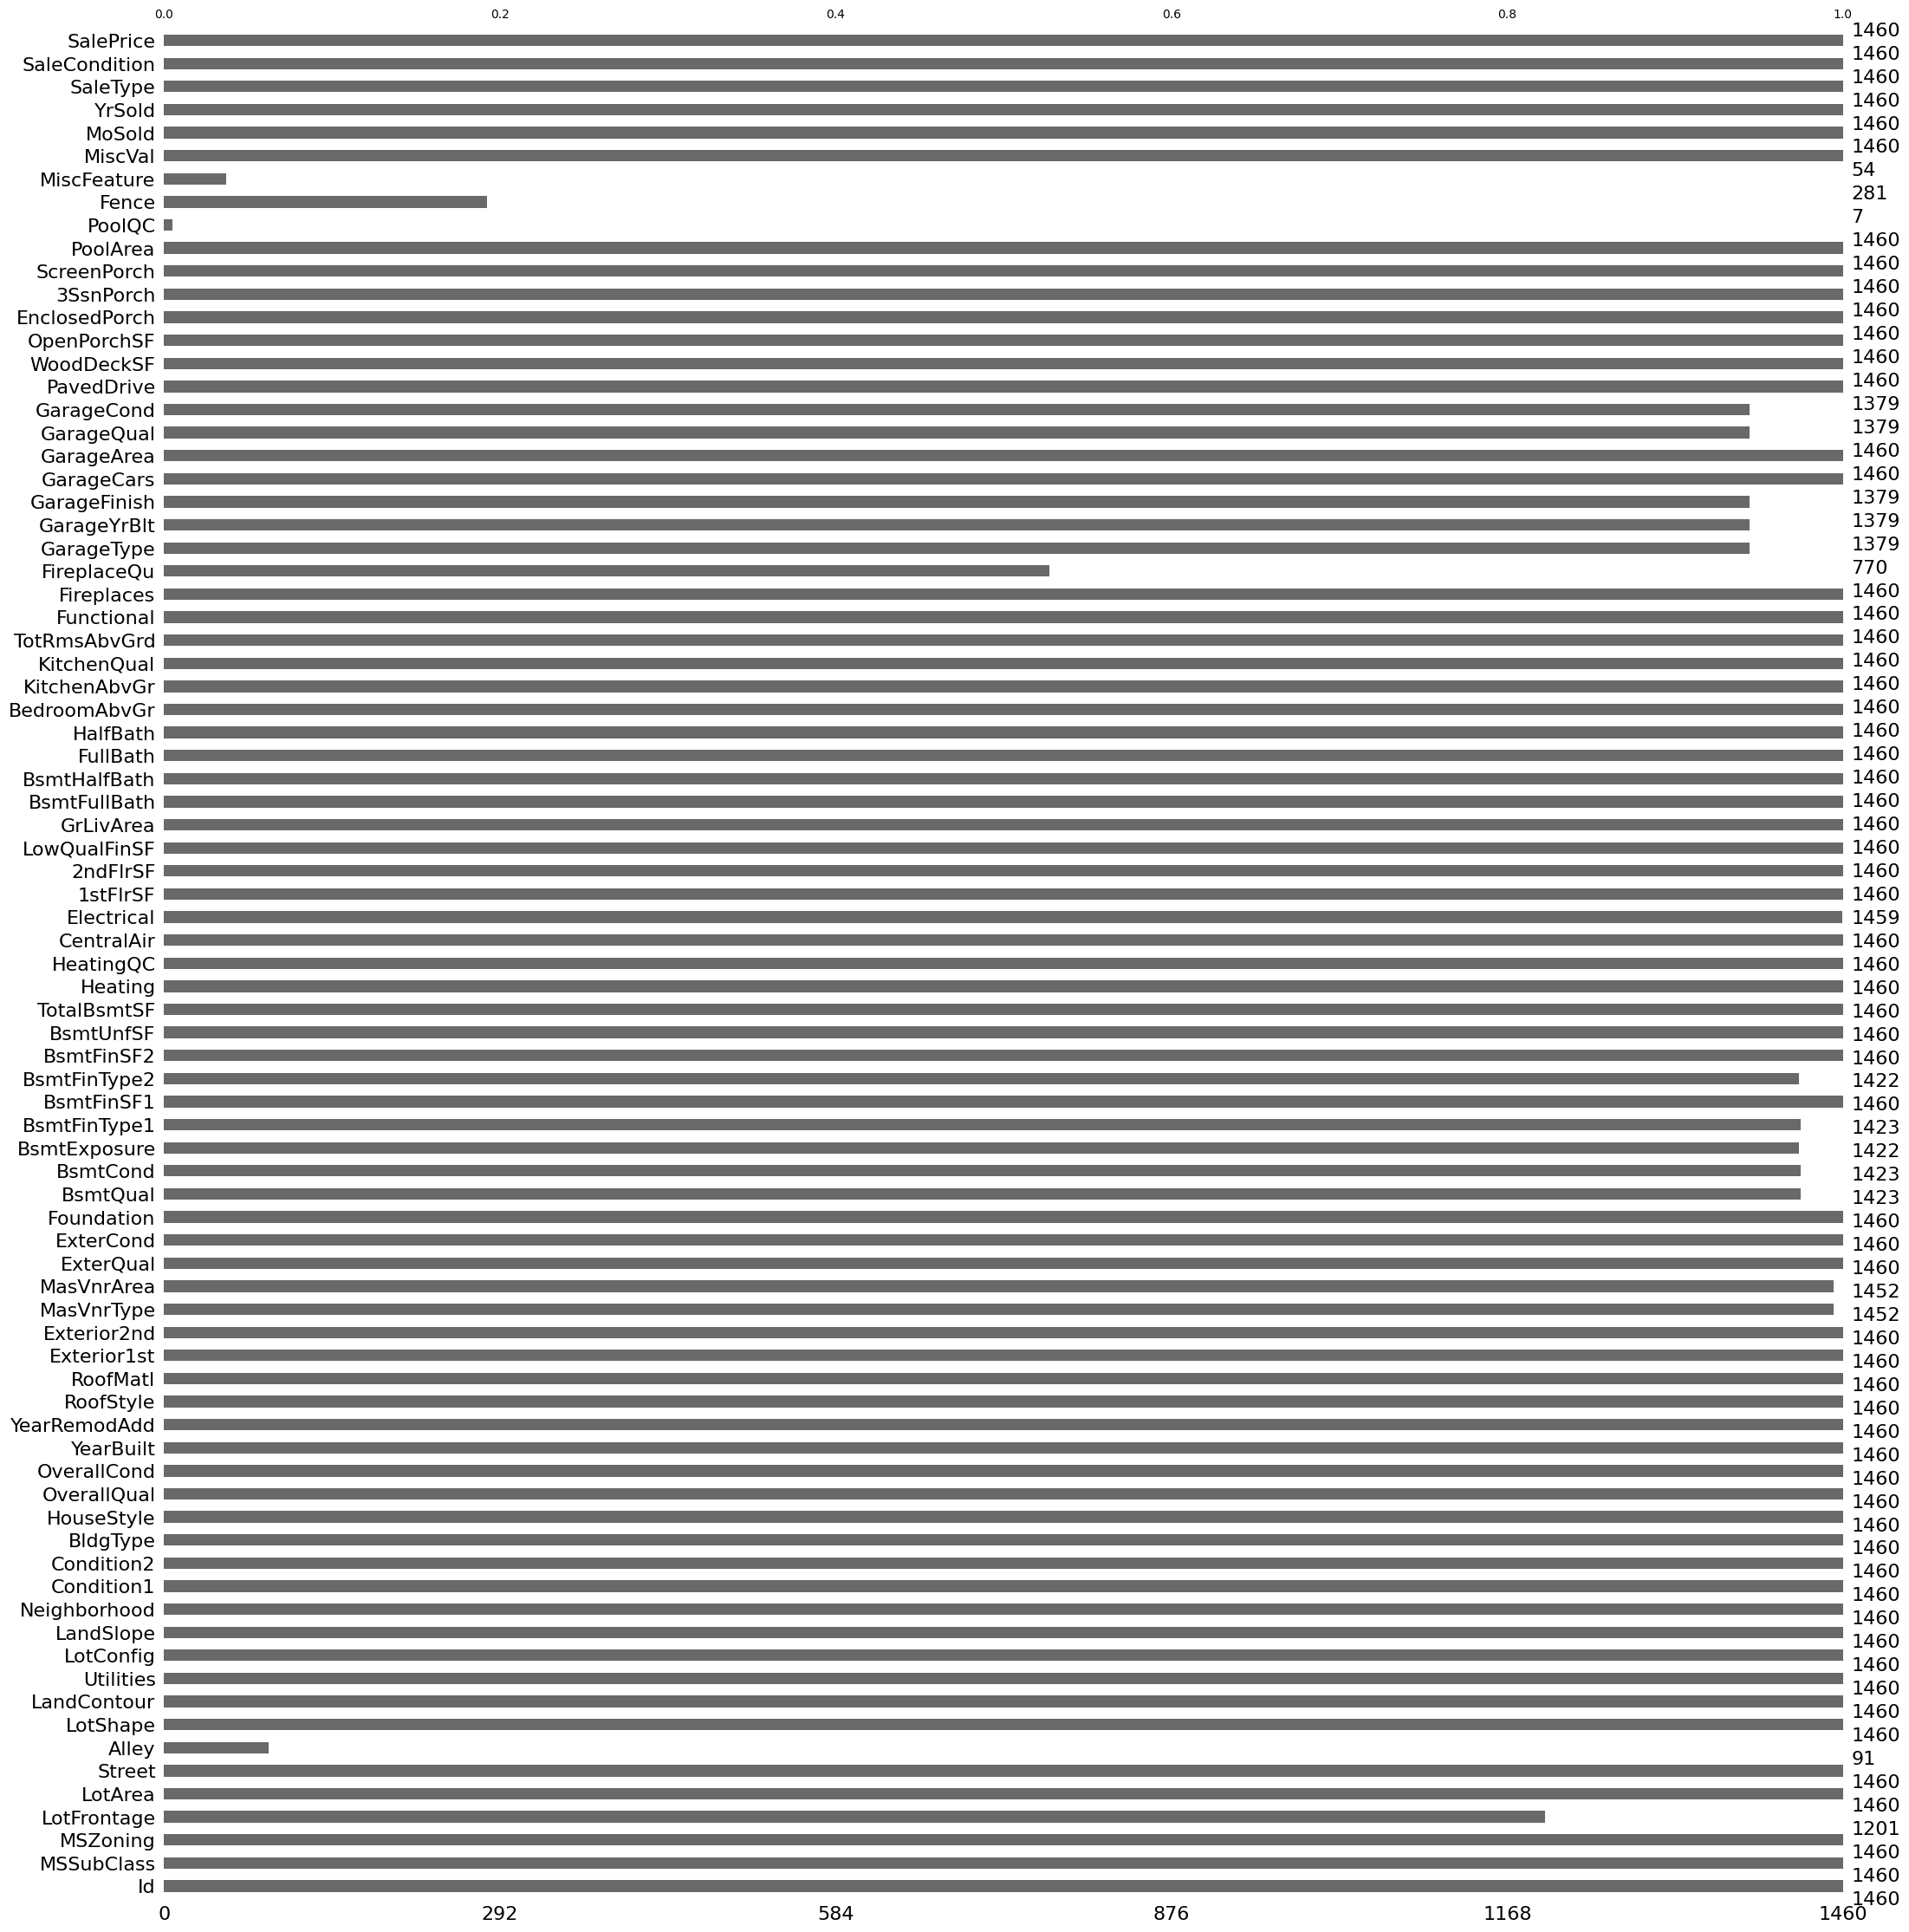

In [487]:
import missingno as msno
msno.bar(data)

Dropping those columns which have less than 25% values


Axes(0.125,0.11;0.775x0.77)


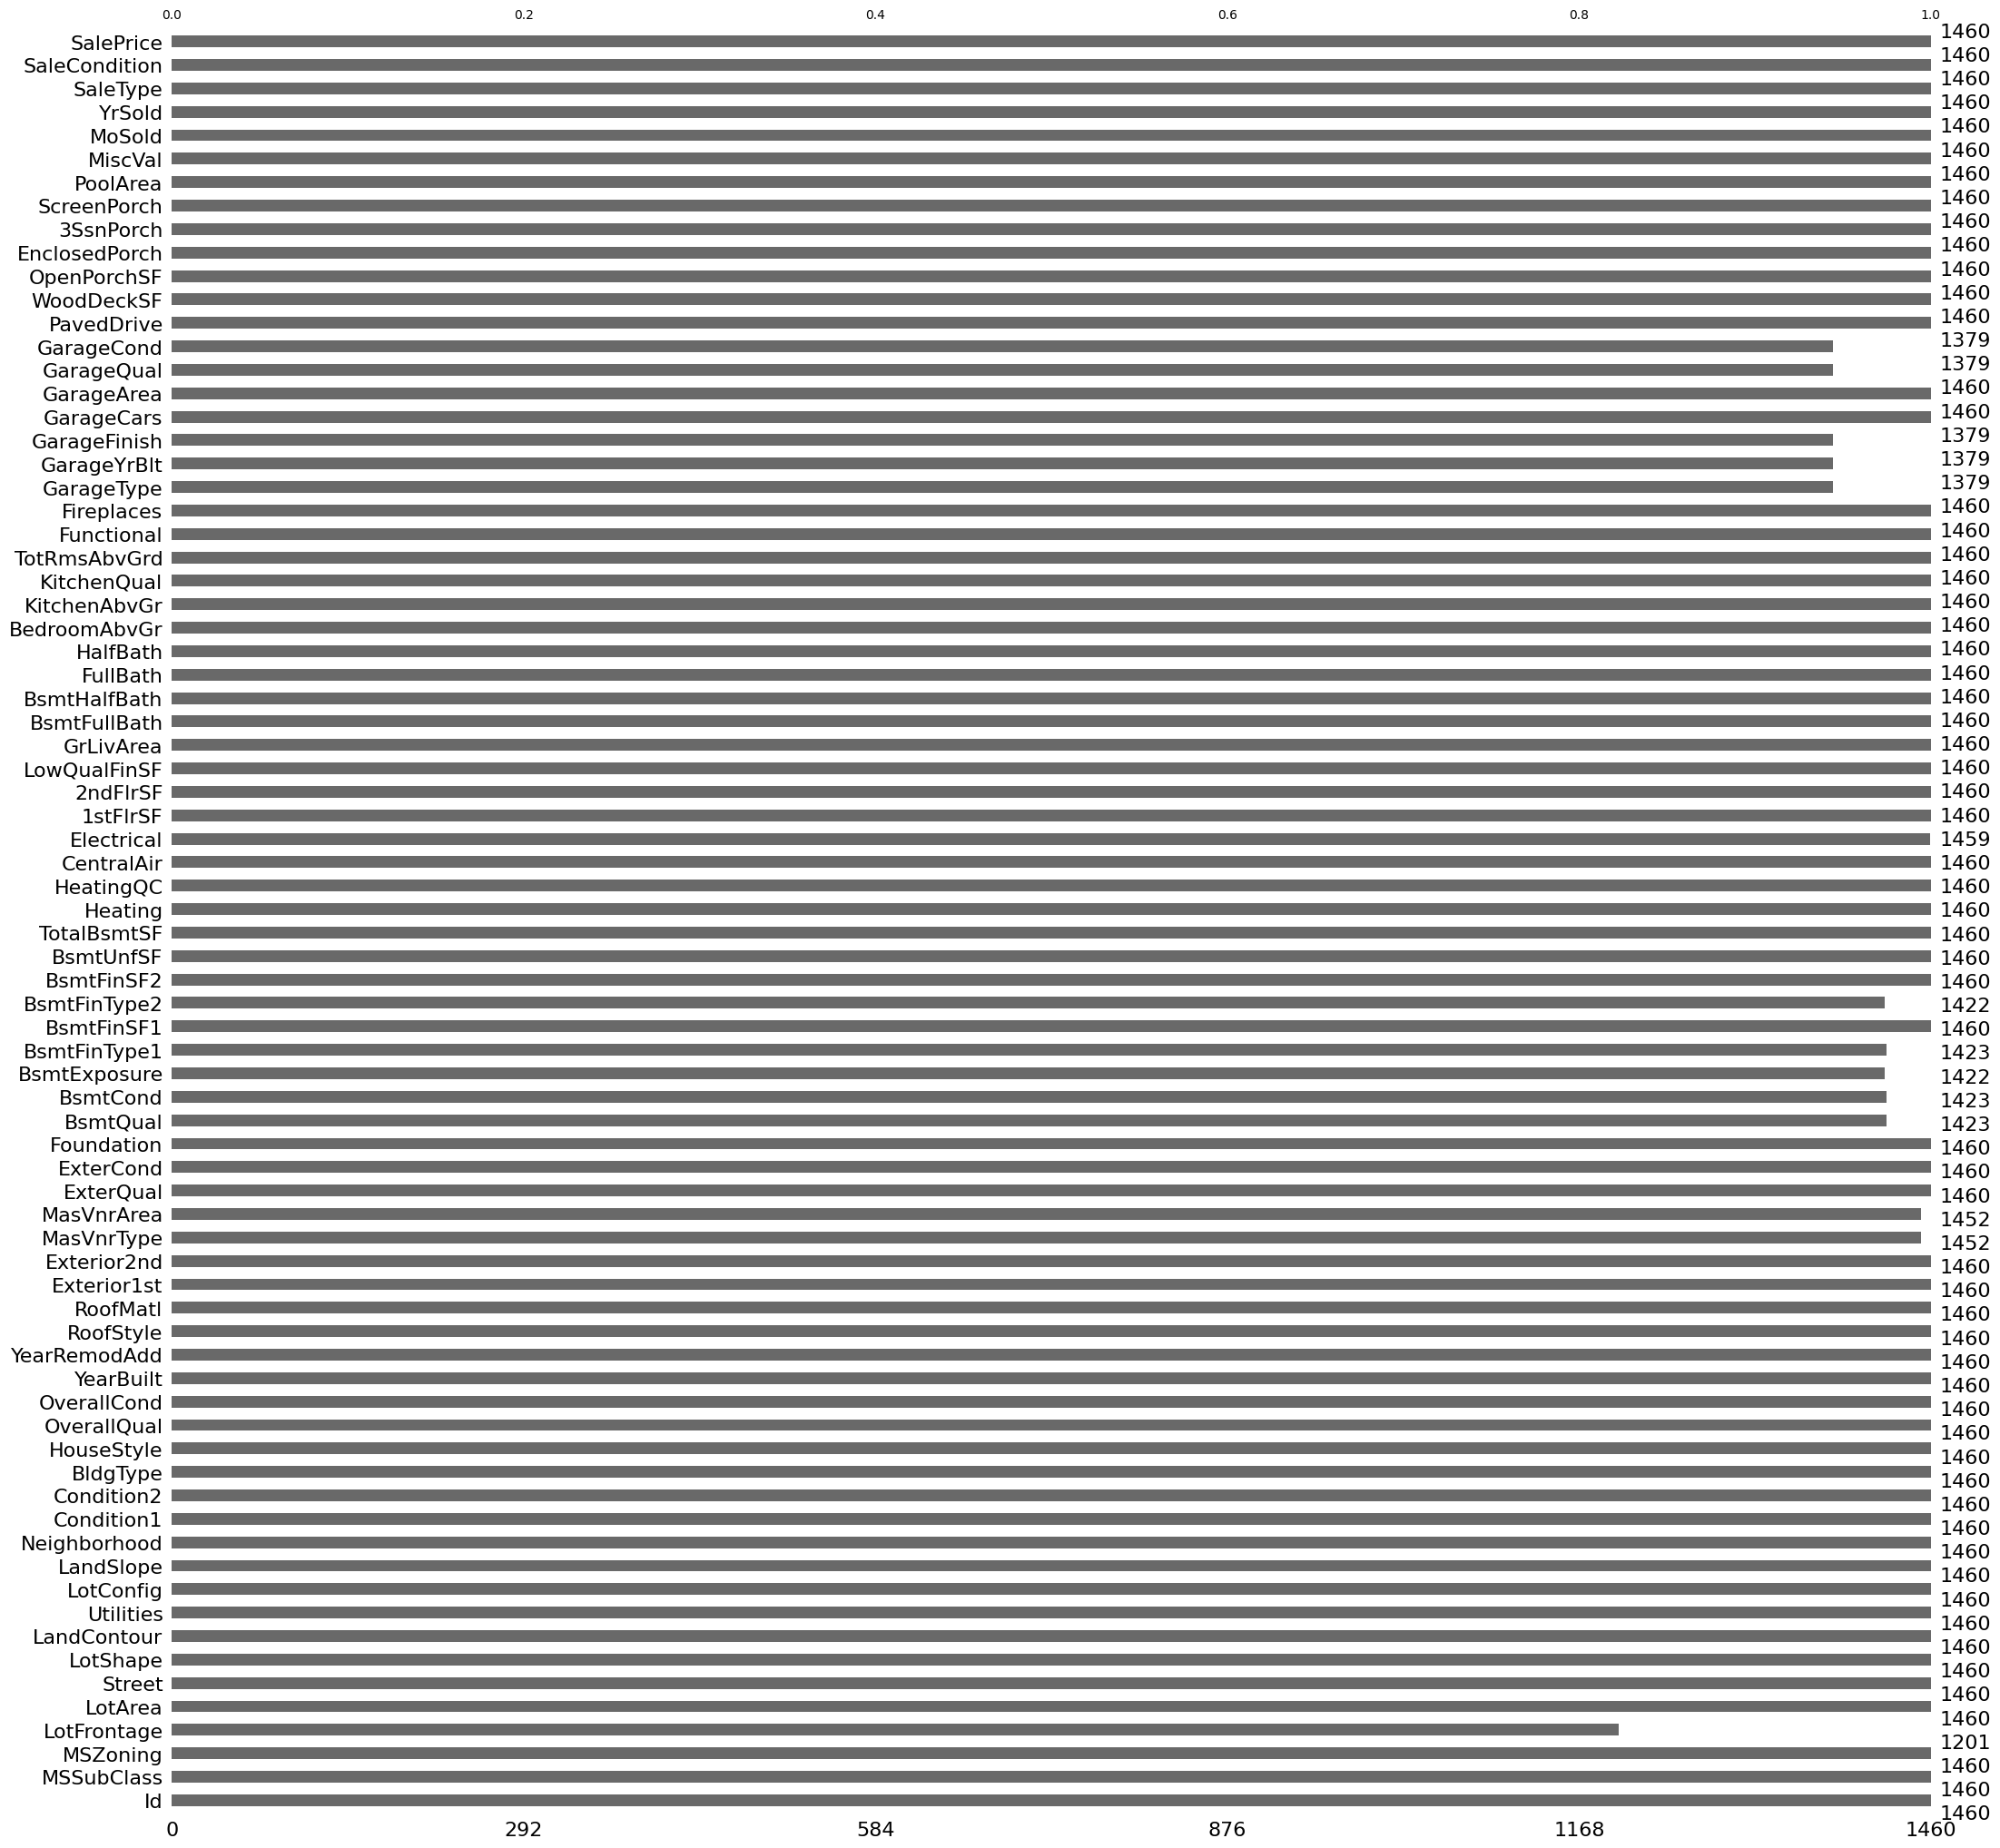

In [488]:
# Calculate the threshold for null values
threshold = len(data) * 0.25  # 25% of total rows

# Iterate through the columns and drop those with null percentages greater than the threshold
for column in data.columns:
    if data[column].isnull().sum() > threshold:
        data.drop(column, axis=1, inplace=True)
print(msno.bar(data))

We still have some missing values in our dataset we will look into further

#4.Basic EDA

#1.Descriptive Analysis

In [489]:
data.describe().style.background_gradient()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#2 Correlation

In [490]:
correlation_matrix = data.corr()
print("Correlation Matrix:")
(correlation_matrix.style.background_gradient())

Correlation Matrix:


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

#3.Feature selection (Numerical)

In [491]:
# Set the correlation threshold for feature selection
correlation_threshold = 0.3

print("Before Feature Selection ",data.shape)

# Select features with correlation above the threshold
selected_features = []
for column in correlation_matrix.columns:
    if abs(correlation_matrix['SalePrice'][column]) < correlation_threshold:
        data = data.drop(columns=column)
    else:
      selected_features.append(column)
print("Selected Features",selected_features)
print("After Feature Selection ",data.shape)

Before Feature Selection  (1460, 76)
Selected Features ['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']
After Feature Selection  (1460, 57)


#4. Checking Skewness of Target Variable

<Axes: xlabel='SalePrice', ylabel='Density'>

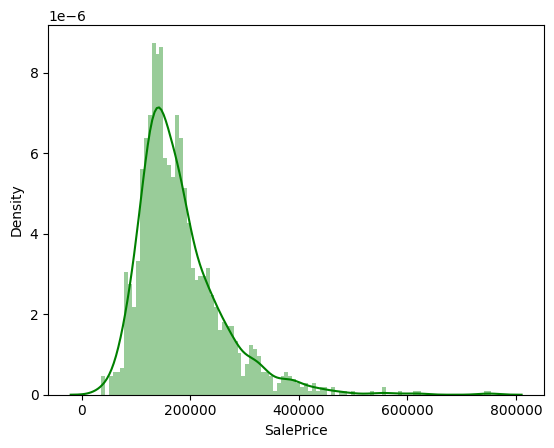

In [492]:
import seaborn as sns
sns.distplot(data['SalePrice'], color='g', bins=100, hist_kws={'alpha' : 0.4})

Salesprice is right skewed means mean> median

#5.Preprocessing

In [493]:
data.head()

,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
0,RL,65.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2,548,TA,TA,Y,0,61,WD,Normal,208500
1,RL,80.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,2,460,TA,TA,Y,298,0,WD,Normal,181500
2,RL,68.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2,608,TA,TA,Y,0,42,WD,Normal,223500
3,RL,60.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,3,642,TA,TA,Y,0,35,WD,Abnorml,140000
4,RL,84.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,3,836,TA,TA,Y,192,84,WD,Normal,250000


#1.Dropping Unnecessary columns

Droping Id column which is not usefull. We already deleted in correlation part

#Scaling feature

In [494]:
SalePrice_data = data[["SalePrice"]]  # Extracting the "SalePrice" column as a separate DataFrame
scaler = StandardScaler()
scaled_SalePrice = scaler.fit_transform(SalePrice_data.values.reshape(-1,1))

In [495]:
# Droping profit column from dataset
data.drop(["SalePrice"],1,inplace = True)
data['scaled_SalePrice'] = scaled_SalePrice

In [496]:
# # Get the mean and standard deviation from the scaler
# mean_profit = scaler.mean_[0]
# std_dev_profit = scaler.scale_[0]

# scaled_prediction =  2.01120333

# # Reverse the scaling to get the prediction in the original units
# original_prediction = (scaled_prediction * std_dev_profit) + mean_profit

# print("Original prediction in dollars:", original_prediction)

In [497]:
sc = StandardScaler()
for col in data.columns:
    if data[col].dtype in ['int64' , 'float64']:
          data[col] = sc.fit_transform(data[col].values.reshape(-1,1))

#2.Converting Categorical Variables into their corresponding form

#A).Cardinality

"Cardinality" means the number of unique values in a column

In [498]:
for col in data.columns:
    if data[col].dtype=='object':
        print()
        print(col)
        print('Number of unique values :',data[col].nunique())
        print('Sample unique values :',data[col].unique()[:5])


MSZoning
Number of unique values : 5
Sample unique values : ['RL' 'RM' 'C (all)' 'FV' 'RH']

Street
Number of unique values : 2
Sample unique values : ['Pave' 'Grvl']

LotShape
Number of unique values : 4
Sample unique values : ['Reg' 'IR1' 'IR2' 'IR3']

LandContour
Number of unique values : 4
Sample unique values : ['Lvl' 'Bnk' 'Low' 'HLS']

Utilities
Number of unique values : 2
Sample unique values : ['AllPub' 'NoSeWa']

LotConfig
Number of unique values : 5
Sample unique values : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

LandSlope
Number of unique values : 3
Sample unique values : ['Gtl' 'Mod' 'Sev']

Neighborhood
Number of unique values : 25
Sample unique values : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel']

Condition1
Number of unique values : 9
Sample unique values : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe']

Condition2
Number of unique values : 8
Sample unique values : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN']

BldgType
Number of unique values : 5
Sample unique values : ['

#B) Encoding all the categorical variable using labelencoder

In [499]:
categorical_cols = [cname for cname in data.columns
                    if data[cname].dtype == "object"]
# categorical_cols

In [500]:
#encoding Embarked column
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype=='object':
      data[col] = le.fit_transform(data[col])

In [501]:
sc = StandardScaler()
for col in data.columns:
    if data[col].dtype in ['int64' , 'float64']:
          data[col] = sc.fit_transform(data[col].values.reshape(-1,1))

In [502]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 57 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSZoning          1460 non-null   float64
 1   LotFrontage       1201 non-null   float64
 2   Street            1460 non-null   float64
 3   LotShape          1460 non-null   float64
 4   LandContour       1460 non-null   float64
 5   Utilities         1460 non-null   float64
 6   LotConfig         1460 non-null   float64
 7   LandSlope         1460 non-null   float64
 8   Neighborhood      1460 non-null   float64
 9   Condition1        1460 non-null   float64
 10  Condition2        1460 non-null   float64
 11  BldgType          1460 non-null   float64
 12  HouseStyle        1460 non-null   float64
 13  OverallQual       1460 non-null   float64
 14  YearBuilt         1460 non-null   float64
 15  YearRemodAdd      1460 non-null   float64
 16  RoofStyle         1460 non-null   float64


#Data imputation

In [503]:
def auto_data_impute(data,get_rid_percent=2):
    for x,y in data.isnull().sum().items():
        percent = y/data.shape[0]
        if percent <= get_rid_percent/100:
            data[x]  = data[x].fillna(data[x].mean())
        else:
            print("removed column : ",x)
            data = data.drop([x],axis=1)
    print("Data imputation successfull")
    return data

In [504]:
data = auto_data_impute(data,get_rid_percent=2)

removed column :  LotFrontage
removed column :  GarageYrBlt
Data imputation successfull


#6.Splitting the dataset

In [505]:
data

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,scaled_SalePrice
0,-0.045532,0.064238,0.750731,0.314667,-0.02618,0.604670,-0.225716,-1.206215,-0.036289,-0.03174,...,0.311725,0.351000,0.11211,0.0689,0.289745,-0.752176,0.216503,0.313867,0.208502,0.347273
1,-0.045532,0.064238,0.750731,0.314667,-0.02618,-0.628316,-0.225716,1.954302,-1.188074,-0.03174,...,0.311725,-0.060731,0.11211,0.0689,0.289745,1.626195,-0.704483,0.313867,0.208502,0.007288
2,-0.045532,0.064238,-1.378933,0.314667,-0.02618,0.604670,-0.225716,-1.206215,-0.036289,-0.03174,...,0.311725,0.631726,0.11211,0.0689,0.289745,-0.752176,-0.070361,0.313867,0.208502,0.536154
3,-0.045532,0.064238,-1.378933,0.314667,-0.02618,-1.861302,-0.225716,-1.039872,-0.036289,-0.03174,...,1.650307,0.790804,0.11211,0.0689,0.289745,-0.752176,-0.176048,0.313867,-3.426284,-0.515281
4,-0.045532,0.064238,-1.378933,0.314667,-0.02618,-0.628316,-0.225716,0.457215,-0.036289,-0.03174,...,1.650307,1.698485,0.11211,0.0689,0.289745,0.780197,0.563760,0.313867,0.208502,0.869843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.045532,0.064238,0.750731,0.314667,-0.02618,0.604670,-0.225716,-0.707186,-0.036289,-0.03174,...,0.311725,-0.060731,0.11211,0.0689,0.289745,-0.752176,-0.100558,0.313867,0.208502,-0.074560
1456,-0.045532,0.064238,0.750731,0.314667,-0.02618,0.604670,-0.225716,0.290872,-0.036289,-0.03174,...,0.311725,0.126420,0.11211,0.0689,0.289745,2.033231,-0.704483,0.313867,0.208502,0.366161
1457,-0.045532,0.064238,0.750731,0.314667,-0.02618,0.604670,-0.225716,-1.039872,-0.036289,-0.03174,...,-1.026858,-1.033914,0.11211,0.0689,0.289745,-0.752176,0.201405,0.313867,0.208502,1.077611
1458,-0.045532,0.064238,0.750731,0.314667,-0.02618,0.604670,-0.225716,-0.041814,-0.036289,-0.03174,...,-1.026858,-1.090059,0.11211,0.0689,0.289745,2.168910,-0.704483,0.313867,0.208502,-0.488523


In [508]:
x = data.iloc[:,:54]
y = data['scaled_SalePrice']

In [509]:
y

0       0.347273
1       0.007288
2       0.536154
3      -0.515281
4       0.869843
          ...   
1455   -0.074560
1456    0.366161
1457    1.077611
1458   -0.488523
1459   -0.420841
Name: scaled_SalePrice, Length: 1460, dtype: float64

In [510]:
x.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition
0,-0.045532,0.064238,0.750731,0.314667,-0.02618,0.604670,-0.225716,-1.206215,-0.036289,-0.03174,...,-0.318475,0.311725,0.351000,0.11211,0.0689,0.289745,-0.752176,0.216503,0.313867,0.208502
1,-0.045532,0.064238,0.750731,0.314667,-0.02618,-0.628316,-0.225716,1.954302,-1.188074,-0.03174,...,-0.318475,0.311725,-0.060731,0.11211,0.0689,0.289745,1.626195,-0.704483,0.313867,0.208502
2,-0.045532,0.064238,-1.378933,0.314667,-0.02618,0.604670,-0.225716,-1.206215,-0.036289,-0.03174,...,-0.318475,0.311725,0.631726,0.11211,0.0689,0.289745,-0.752176,-0.070361,0.313867,0.208502
3,-0.045532,0.064238,-1.378933,0.314667,-0.02618,-1.861302,-0.225716,-1.039872,-0.036289,-0.03174,...,0.801942,1.650307,0.790804,0.11211,0.0689,0.289745,-0.752176,-0.176048,0.313867,-3.426284
4,-0.045532,0.064238,-1.378933,0.314667,-0.02618,-0.628316,-0.225716,0.457215,-0.036289,-0.03174,...,-0.318475,1.650307,1.698485,0.11211,0.0689,0.289745,0.780197,0.563760,0.313867,0.208502


Training set - 75%

Testing set - 15%

Validation set - 10%

In [511]:
x_train,x_part,y_train,y_part = train_test_split(x,y,test_size = 0.25,random_state = 1)
x_test,x_valid,y_test,y_valid = train_test_split(x_part,y_part,test_size = 0.4,random_state = 1)

In [512]:
print(x_train.shape,x_test.shape,x_valid.shape)
print(y_train.shape,y_test.shape,y_valid.shape)

(1095, 54) (219, 54) (146, 54)
(1095,) (219,) (146,)


#7.Model Selection

#A) Linear regression from scratch

In [513]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient descent optimization
        for _ in range(self.num_iterations):
            predicted = np.dot(X, self.weights) + self.bias
            error = y - predicted

            # Update weights and bias using gradients
            self.weights += (self.learning_rate / num_samples) * np.dot(X.T, error)
            self.bias += (self.learning_rate / num_samples) * np.sum(error)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Create a linear regression model
model = LinearRegression(learning_rate=0.01, num_iterations=1000)

# Fit the model to the data
model.fit(x_train, y_train)

In [514]:
# Calculate Mean Squared Error (MSE)
def mean_squared_error(y_test,y_pred ):
    return np.mean((y_test - y_pred) ** 2)

# Calculate Root Mean Squared Error (RMSE)
def root_mean_squared_error(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared (coefficient of determination)
def r_squared(y_test, y_pred):
    y_mean = np.mean(y_test)
    ss_total = np.sum((y_test - y_mean) ** 2)
    ss_residual = np.sum((y_test - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)


In [515]:
# For testing
# Make predictions
y_pred = model.predict(x_test)

In [516]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r_squared(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 0.18648684238029734
Root Mean Squared Error: 0.43184122357678795
R-squared: 0.8466170598362222


#USING SCIKIT LEARN LIBRARY

In [517]:
def model_performance(model,model_name,x_train = x_train,y_train = y_train,x_test = x_test,y_test = y_test,x_valid = x_valid,y_valid = y_valid):

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    y_val_pred = model.predict(x_valid)

    # Training_Score = np.round(model.score(x_train,y_train),3)
    # Testing_Score = np.round(model.score(x_test,y_test),3)
    # Validation_score = np.round(model.score(x_valid,y_valid))

    # mse_training = np.round(mean_squared_error(y_train,y_train_pred),3)
    mse_testing = np.round(mean_squared_error(y_test,y_test_pred),3)
    # mse_validation = np.round(mean_squared_error(y_valid,y_val_pred),3)

    # mae_training = np.round(mean_absolute_error(y_train,y_train_pred),3)
    mae_testing = np.round(mean_absolute_error(y_test,y_test_pred),3)
    # mae_valid = np.round(mean_absolute_error(y_valid,y_val_pred),3)

    # r2_training = np.round(r2_score(y_train,y_train_pred),3)
    r2_testing = np.round(r2_score(y_test,y_test_pred),3)
    # r2_valid = np.round(r2_score(y_valid,y_val_pred),3)

    print("Model Performance for:",model_name)
    print("")

    # print("Training Score:",Training_Score)
    # print("Testing Score:",Testing_Score)
    # print("Validation Score",Validation_score)
    # print("")

    # print("Training Data Mean Squared Error:",mse_training)
    print("Testing Data Mean Squared Error:",mse_testing)
    # print("Validation Data Mean Squared Error:",mse_validation)

    print("")

    # print("Training Data Mean Absolute Error:",mae_training)
    print("Testing Data Mean Absolute Error:",mae_testing)
    # print("Validation Data Mean Absolute Error:",mae_valid)
    print("")

    # print("Training Data r2_score:",r2_training)
    print("Testing Data r2_score:",r2_testing)
    # print("Validation Data r2_score:",r2_valid)
    print("")

    print("Residual Analysis:")
    # plt.figure(figsize = (20,5))
    # # plt.scatter(y_train,(y_train-y_train_pred),color = "red",label = 'Training Predictions')
    # plt.scatter(y_test,(y_test-y_test_pred),color = "green",label = 'Testing Predictions')
    # # plt.scatter(y_valid,(y_valid-y_val_pred),color = 'blue',label = "Validation Predictions")
    # plt.legend()
    # plt.show()

    return mse_testing,mae_testing,r2_testing

In [518]:
model1 = LinearRegression()
model1.fit(x_train,y_train)

#Comparisation

In [519]:
lr_perf = model_performance(model1,model_name = model1)

Model Performance for: <__main__.LinearRegression object at 0x7c1df46b4850>

Testing Data Mean Squared Error: 0.186

Testing Data Mean Absolute Error: 0.248

Testing Data r2_score: 0.847

Residual Analysis:



Linear Reggression written in scrach (For testing set)

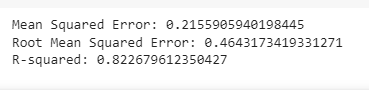